# Individual Assignment 1
## Clustering Jewelry Customer Data using K-Means, Hierarchical, and DBScan Algorithms (How Lovely!)

At a local jewelry store, we've collected features such as: age, income, spending score and savings. We'll use these features to segment the customers and create customer personas.

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/jdonvl/MMASandbox/master/data/jewelry_customers.csv')

In [13]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [16]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


All of the data is numeric. We will need to scale the data.

In [20]:
from sklearn.preprocessing import StandardScaler

X = df.copy()
col_names = X.columns
X.head()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[1:10,]

array([[-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       [-8.21109365e-04, -3.17123951e-02,  1.00470466e+00,
        -9.13394630e-01],
       [ 1.16022753e+00, -1.60616460e+00, -6.02618775e-01,
         1.01268619e+00],
       [-1.24480180e+00,  1.55920380e+00,  1.31835884e+00,
        -1.68414067e+00],
       [-2.08151224e-01,  2.74411535e-02,  1.07995544e+00,
        -1.00793738e+00],
       [ 1.16022753e+00, -9.15567087e-01, -5.77511904e-01,
         1.25878240e+00],
       [ 9.94363441e-01, -1.14383804e+00, -6.95375294e-01,
         5.90762597e-01],
       [ 1.03582946e+00, -1.32992004e+00, -5.32121174e-01,
         1.21697119e+00]])

## Comparing Clustering Algorithms
### K-Means

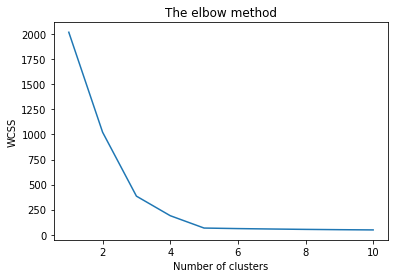

In [26]:
# Reference: https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5212589967674505
For n_clusters = 3 The average silhouette_score is : 0.6963481945884472
For n_clusters = 4 The average silhouette_score is : 0.7581191889903789
For n_clusters = 5 The average silhouette_score is : 0.8048976287755765
For n_clusters = 6 The average silhouette_score is : 0.6331488698589305


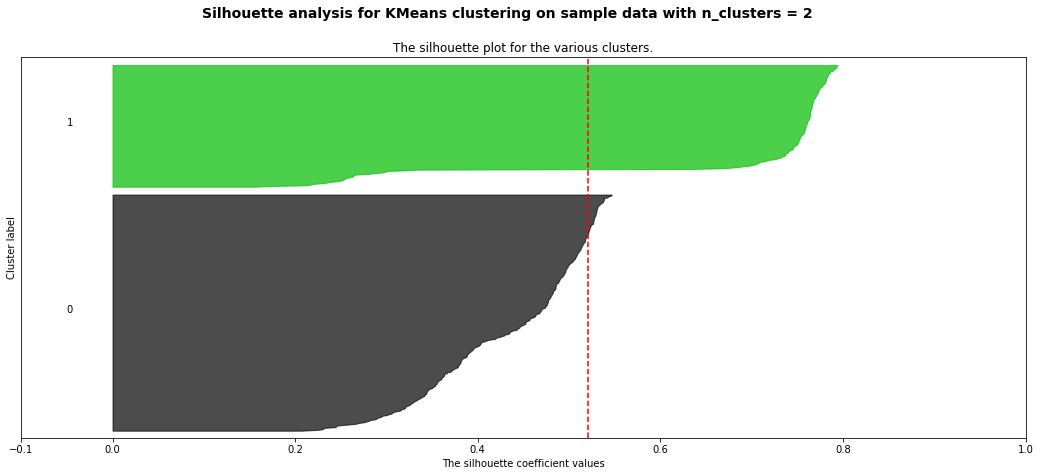

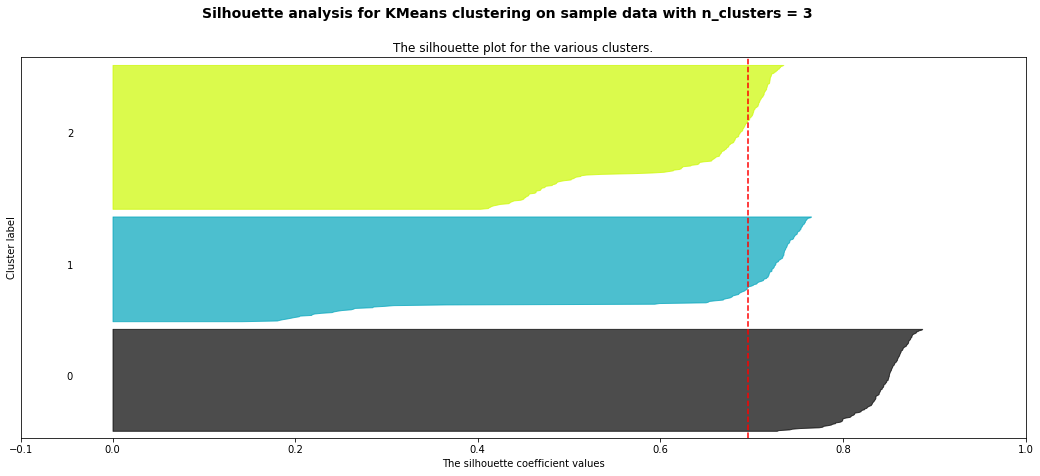

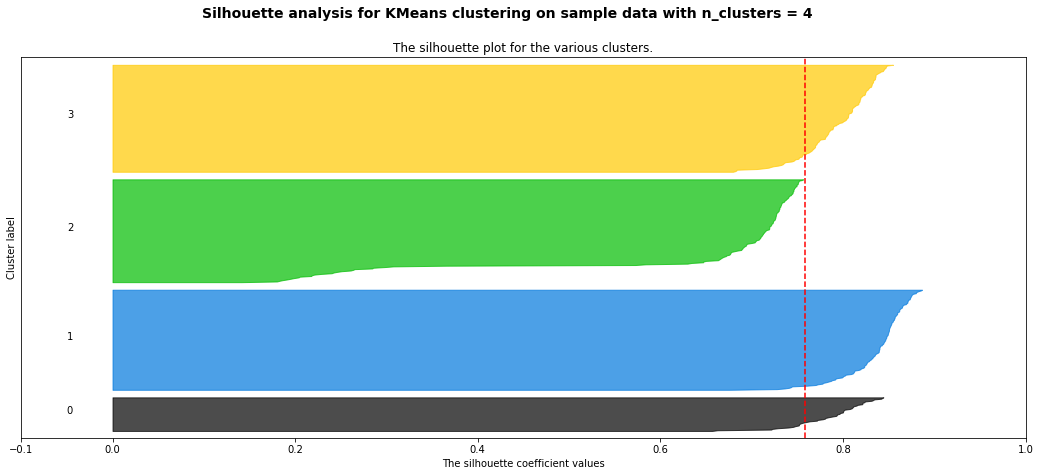

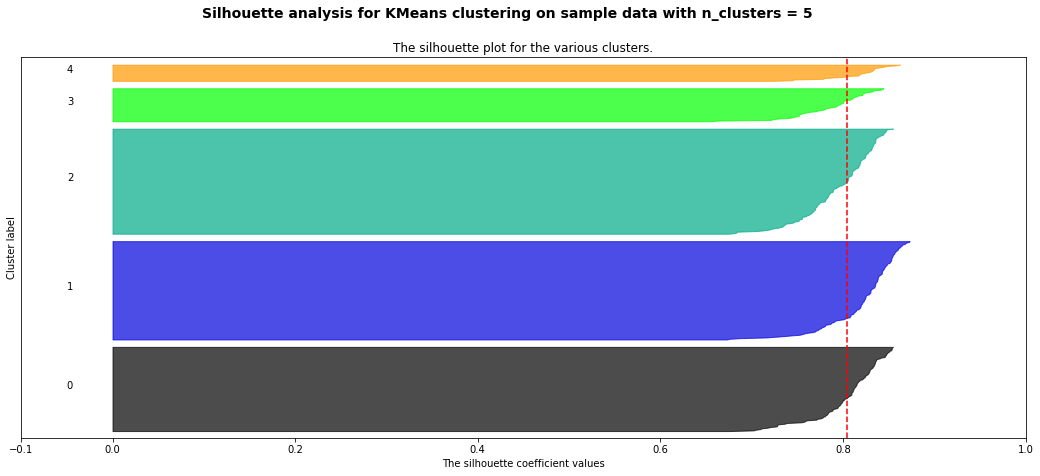

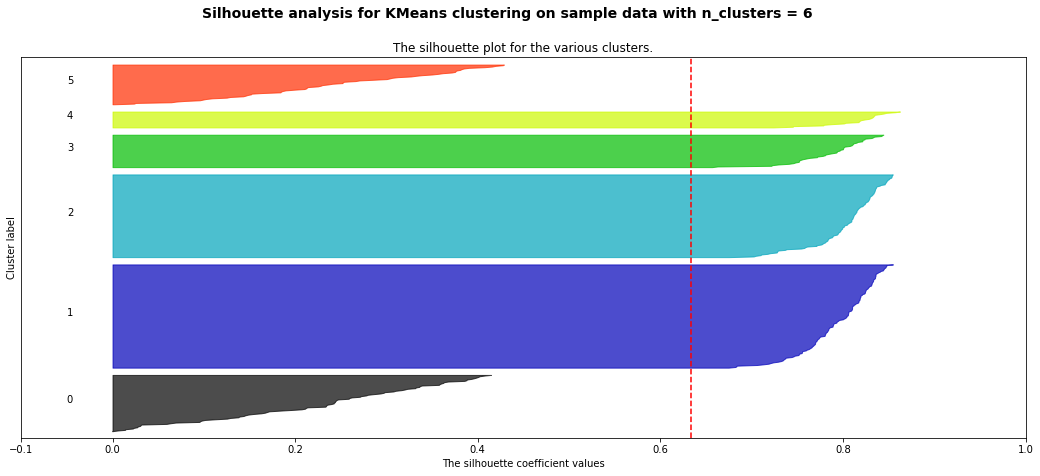

In [56]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range(2, 7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Hierarchical Clustering

In [52]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

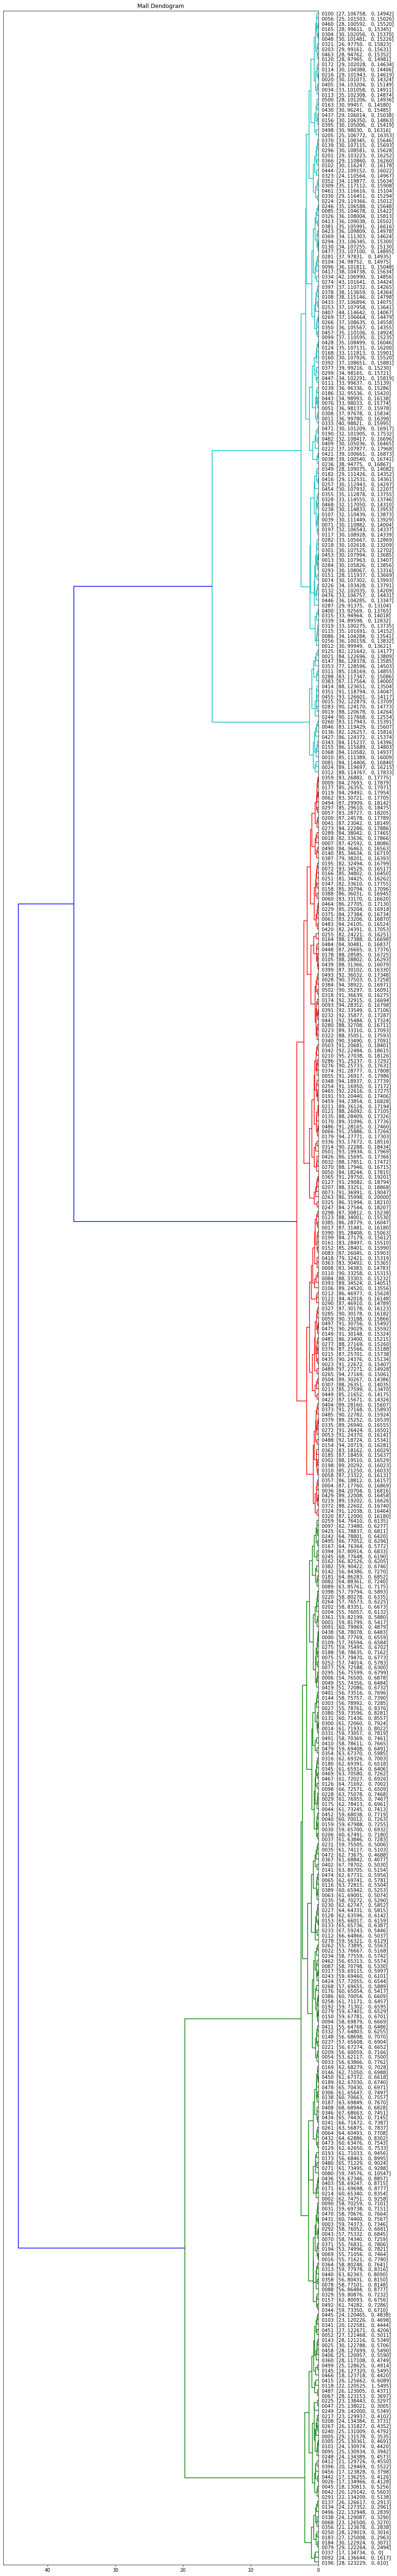

In [55]:

# Cool custom function to give each leaf of the dendrogram a label - here, I'm just printing out feature values for each isntance in a pretty way.
def llf(id):
    Xr = [int(x) for x in scaler.inverse_transform(X[id, :])]
    return "{:>04d}: [{:>2d}, {:>2d}, {:>3d}, {:>2d}]".format(id, Xr[0], Xr[1], Xr[2], Xr[3])


# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(12, 100));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl, orientation="left", leaf_font_size=10, leaf_label_func=llf);

For n_clusters = 2 The average silhouette_score is : 0.5147611831581517
For n_clusters = 3 The average silhouette_score is : 0.6963481945884472
For n_clusters = 4 The average silhouette_score is : 0.7581191889903789
For n_clusters = 5 The average silhouette_score is : 0.8048976287755765
For n_clusters = 6 The average silhouette_score is : 0.6277445976689175


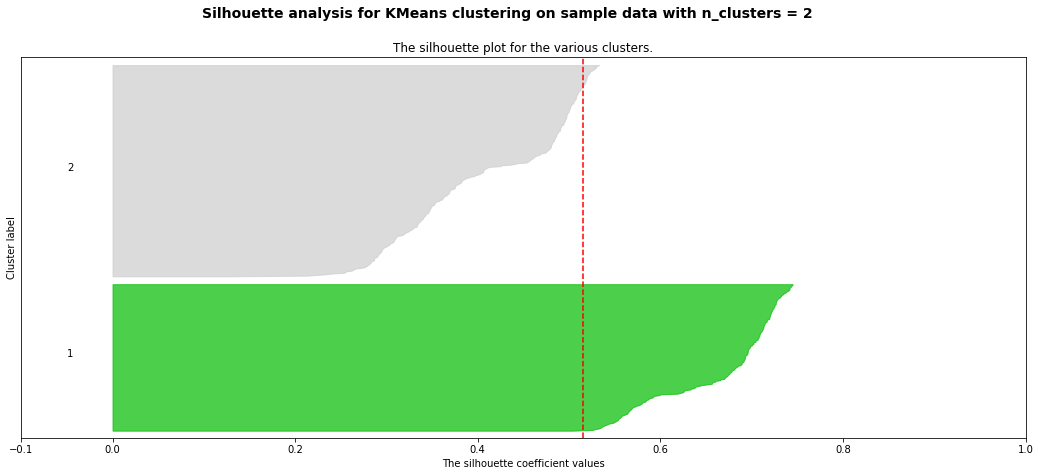

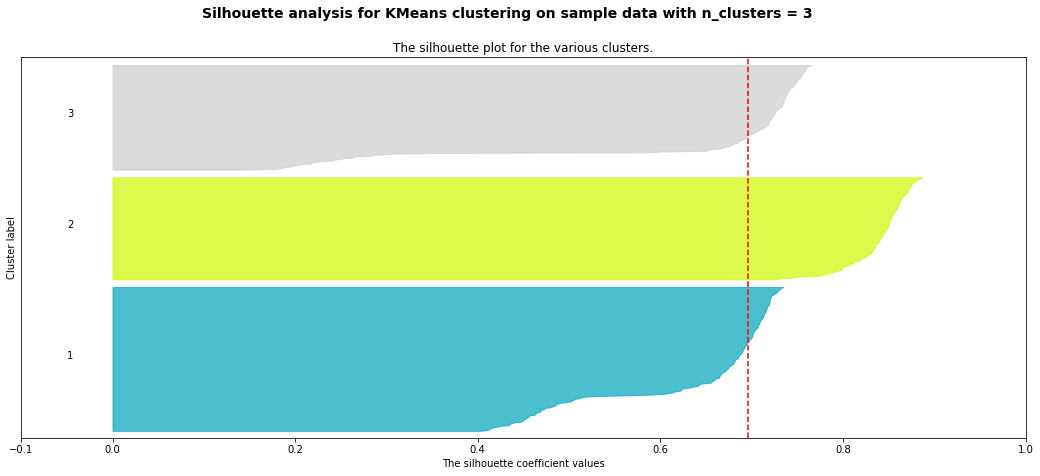

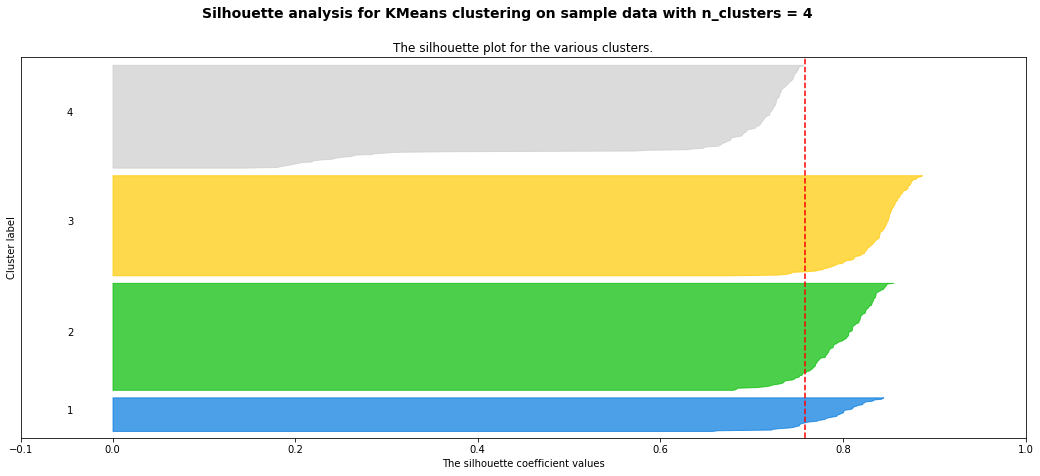

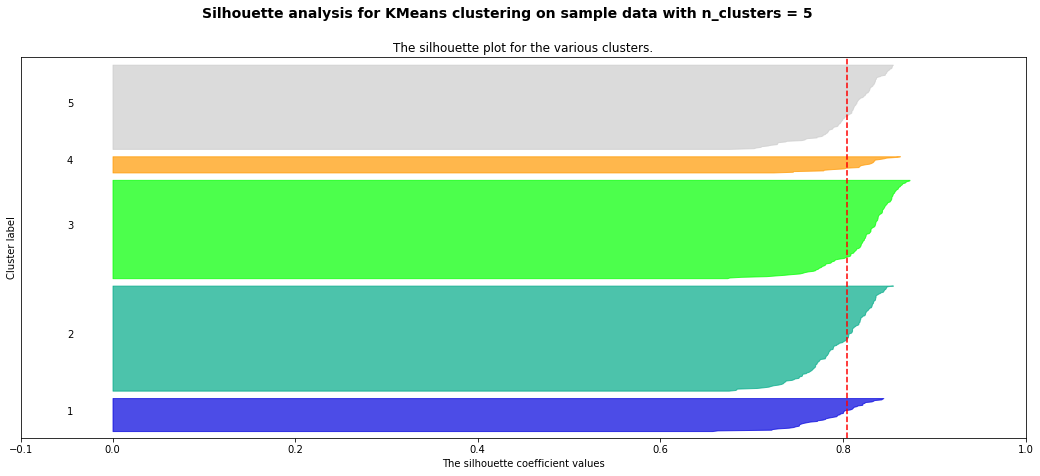

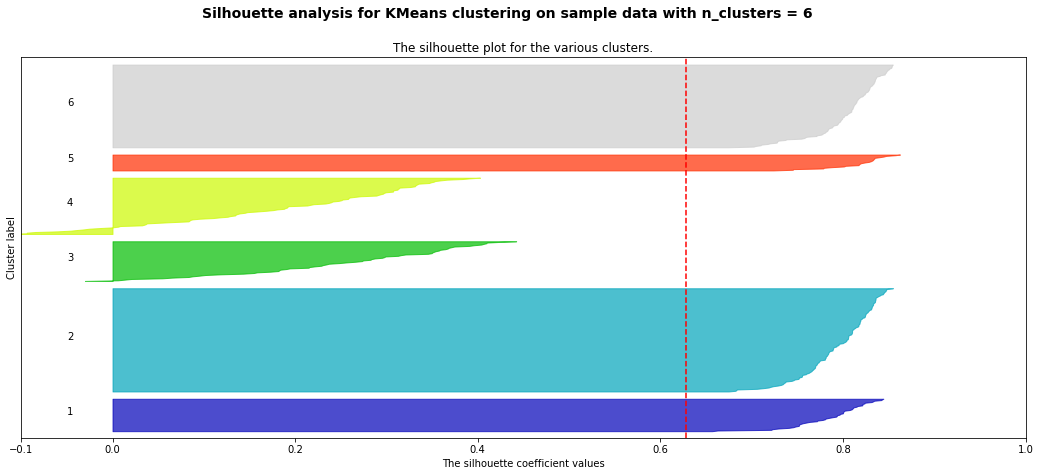

In [61]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range(2, 7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    cluster_labels = scipy.cluster.hierarchy.fcluster(aggl, n_clusters, criterion="maxclust")

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(1,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### DBSCAN

In [68]:
from sklearn.cluster import DBSCAN

eps_range = [0.3, 0.35, 0.4, 0.45, 0.5]
min_samples_range = [10, 20, 30, 40, 50]

# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


range_n_clusters = [2, 3, 4, 5, 6]

for eps in eps_range:
    for min_samp in min_samples_range:

        db = DBSCAN(eps=eps, min_samples=min_samp).fit(X)
        cluster_labels = db.labels_
        n_clusters = len(set(cluster_labels))
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For eps =", eps, ", min_samples = ", min_samp, ", n_clusters = ", n_clusters,
              "The average silhouette_score is :", silhouette_avg)



For eps = 0.3 , min_samples =  10 , n_clusters =  6 The average silhouette_score is : 0.7147946139498471
For eps = 0.3 , min_samples =  20 , n_clusters =  4 The average silhouette_score is : 0.5766617915017334
For eps = 0.3 , min_samples =  30 , n_clusters =  4 The average silhouette_score is : 0.49871420184510107
For eps = 0.3 , min_samples =  40 , n_clusters =  4 The average silhouette_score is : 0.31446123786651464
For eps = 0.3 , min_samples =  50 , n_clusters =  4 The average silhouette_score is : 0.1055754438240698
For eps = 0.35 , min_samples =  10 , n_clusters =  6 The average silhouette_score is : 0.7827401673618568
For eps = 0.35 , min_samples =  20 , n_clusters =  5 The average silhouette_score is : 0.7353868305514377
For eps = 0.35 , min_samples =  30 , n_clusters =  4 The average silhouette_score is : 0.664642453434838
For eps = 0.35 , min_samples =  40 , n_clusters =  4 The average silhouette_score is : 0.6458244672812745
For eps = 0.35 , min_samples =  50 , n_clusters = 

### Comments about hyper-parameters

For the k-means algorithm, using the elbow method, we observe a discernable elbow with 5 clusters. The elbow method measures the inertia, WCSS, or intra-cluster distance. We know that as we increase the number of clusters, the inertia will continue to decrease. Therefore, we select the point at which increase the number of clusters further leads to diminishing returns on inertia.

Additionally, we calculated the silhouette coefficient for differing values of k, and 5 clusters had the highest score with 0.805. Higher silhouette coefficients measure higher inter-cluster distance. We want clusters to be further away from other clusters (i.e. the members of one cluster are more distinct from other clusters).

We also used the Hierarchical and DBSCAN methods, which produced similar silhouette scores for 5 clusters (~0.8). We proceed with the k-means method, with k = 5.

## Interpreting Clusters


In [29]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [30]:
labels = kmeans.labels_

### Cluster Averages and Ranges

In [43]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,59.02,97.00,83.18,57.56,24.79
Income,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
SpendingScore,0.00,0.51,1.00,0.76,0.57,0.14
Savings,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 0:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.00,32.78,44.00,59.62,62.86,66.99
Income,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
SpendingScore,0.17,0.31,0.41,0.51,0.45,0.51
Savings,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23



Cluster 1:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.00,59.96,68.00,59.49,63.48,52.66
Income,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
SpendingScore,0.66,0.77,0.91,0.51,0.61,0.58
Savings,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 2:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.00,87.78,97.00,59.53,58.71,47.69
Income,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
SpendingScore,0.20,0.33,0.47,0.51,0.59,0.63
Savings,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,24.18,31.00,59.58,49.02,45.82
Income,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
SpendingScore,0.81,0.90,1.00,0.51,0.55,0.44
Savings,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.00,86.00,93.00,59.58,56.77,58.46
Income,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
SpendingScore,0.00,0.07,0.16,0.51,0.62,0.36
Savings,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13


### Cluster Examplars

In [47]:
K=5
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))


Cluster 0 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 1 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 2 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 3 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]


In [50]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df.iloc[[exemplar_idx]])


Cluster 0:


,Age,Income,SpendingScore,Savings
405,34,103204,0.30,15149.81



Cluster 1:


,Age,Income,SpendingScore,Savings
467,61,72027,0.76,6926.12



Cluster 2:


,Age,Income,SpendingScore,Savings
335,89,26940,0.33,16555.16



Cluster 3:


,Age,Income,SpendingScore,Savings
95,25,130934,0.91,3942.39



Cluster 4:


,Age,Income,SpendingScore,Savings
155,86,115689,0.06,14803.15


### Cluster Features Relative to each Other

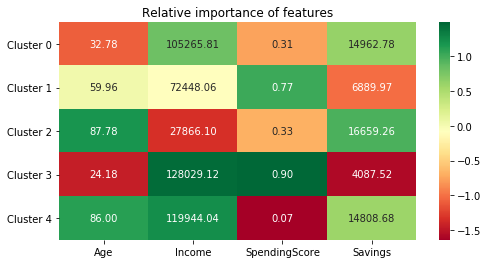

In [51]:
import seaborn as sns

all_means = X.mean(axis=0)

relative_imp = means - all_means

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);

### Create Personas
Cluster 0 – Thrifty working class  
These individuals have average income and relatively high savings. They are between the ages of 22 and 44 and are most likely working steady full-time jobs. Their spending score is the second lowest so likely they shop for life events and milestones.   

Cluster 1 – Almost retired, let’s treat ourselves  
This group is nearing retirement ages (51 to 68), and do not make top-tier money. But they are willing to treat themselves! They have worked for a long time and want to spend some money before going into a more frugal savings life.  

Cluster 2 – Grandparents with a pension  
This group of 79-97-year old’s might be living off retirement savings plans and pensions with an average annual income of $28K. Relative to the group, they have the highest savings and are spending moderately. They may be treating buying a few gifts for their family.  

Cluster 3 - Young, affluent, high rollers  
Our highest spenders of the bunch, these individuals also happen to be our youngest, with ages ranging between 17 and 31. They average the highest income at 128K, but are also living in the now with the least amount of savings.

Cluster 4 – Frugal senior business owners  
For some reason, this group of 77-93-year old’s are still making great income at $119K! They have good savings, but they spend sparsely. Must be looking for a present for a special someone!   


## References  
* https://uc-r.github.io/hc_clustering  
* https://github.com/stepthom/sandbox/blob/master/slides_clustering_interpret.ipynb  
* https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/  
* https://stackoverflow.com/questions/49996305/hierarchical-clustering  
* https://github.com/stepthom/sandbox/blob/master/slides_clustering_simple.ipynb  